In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

In [2]:
#extract values for input and output column
X,y=load_iris(return_X_y=True)

In [3]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2,test_size=0.2)

In [4]:
#import the model
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [5]:
#train the model
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [6]:
y_pred=dt.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score
print(f'The accuracy score is {str(accuracy_score(y_test,y_pred)*100)[0:4]}%')

The accuracy score is 93.3%


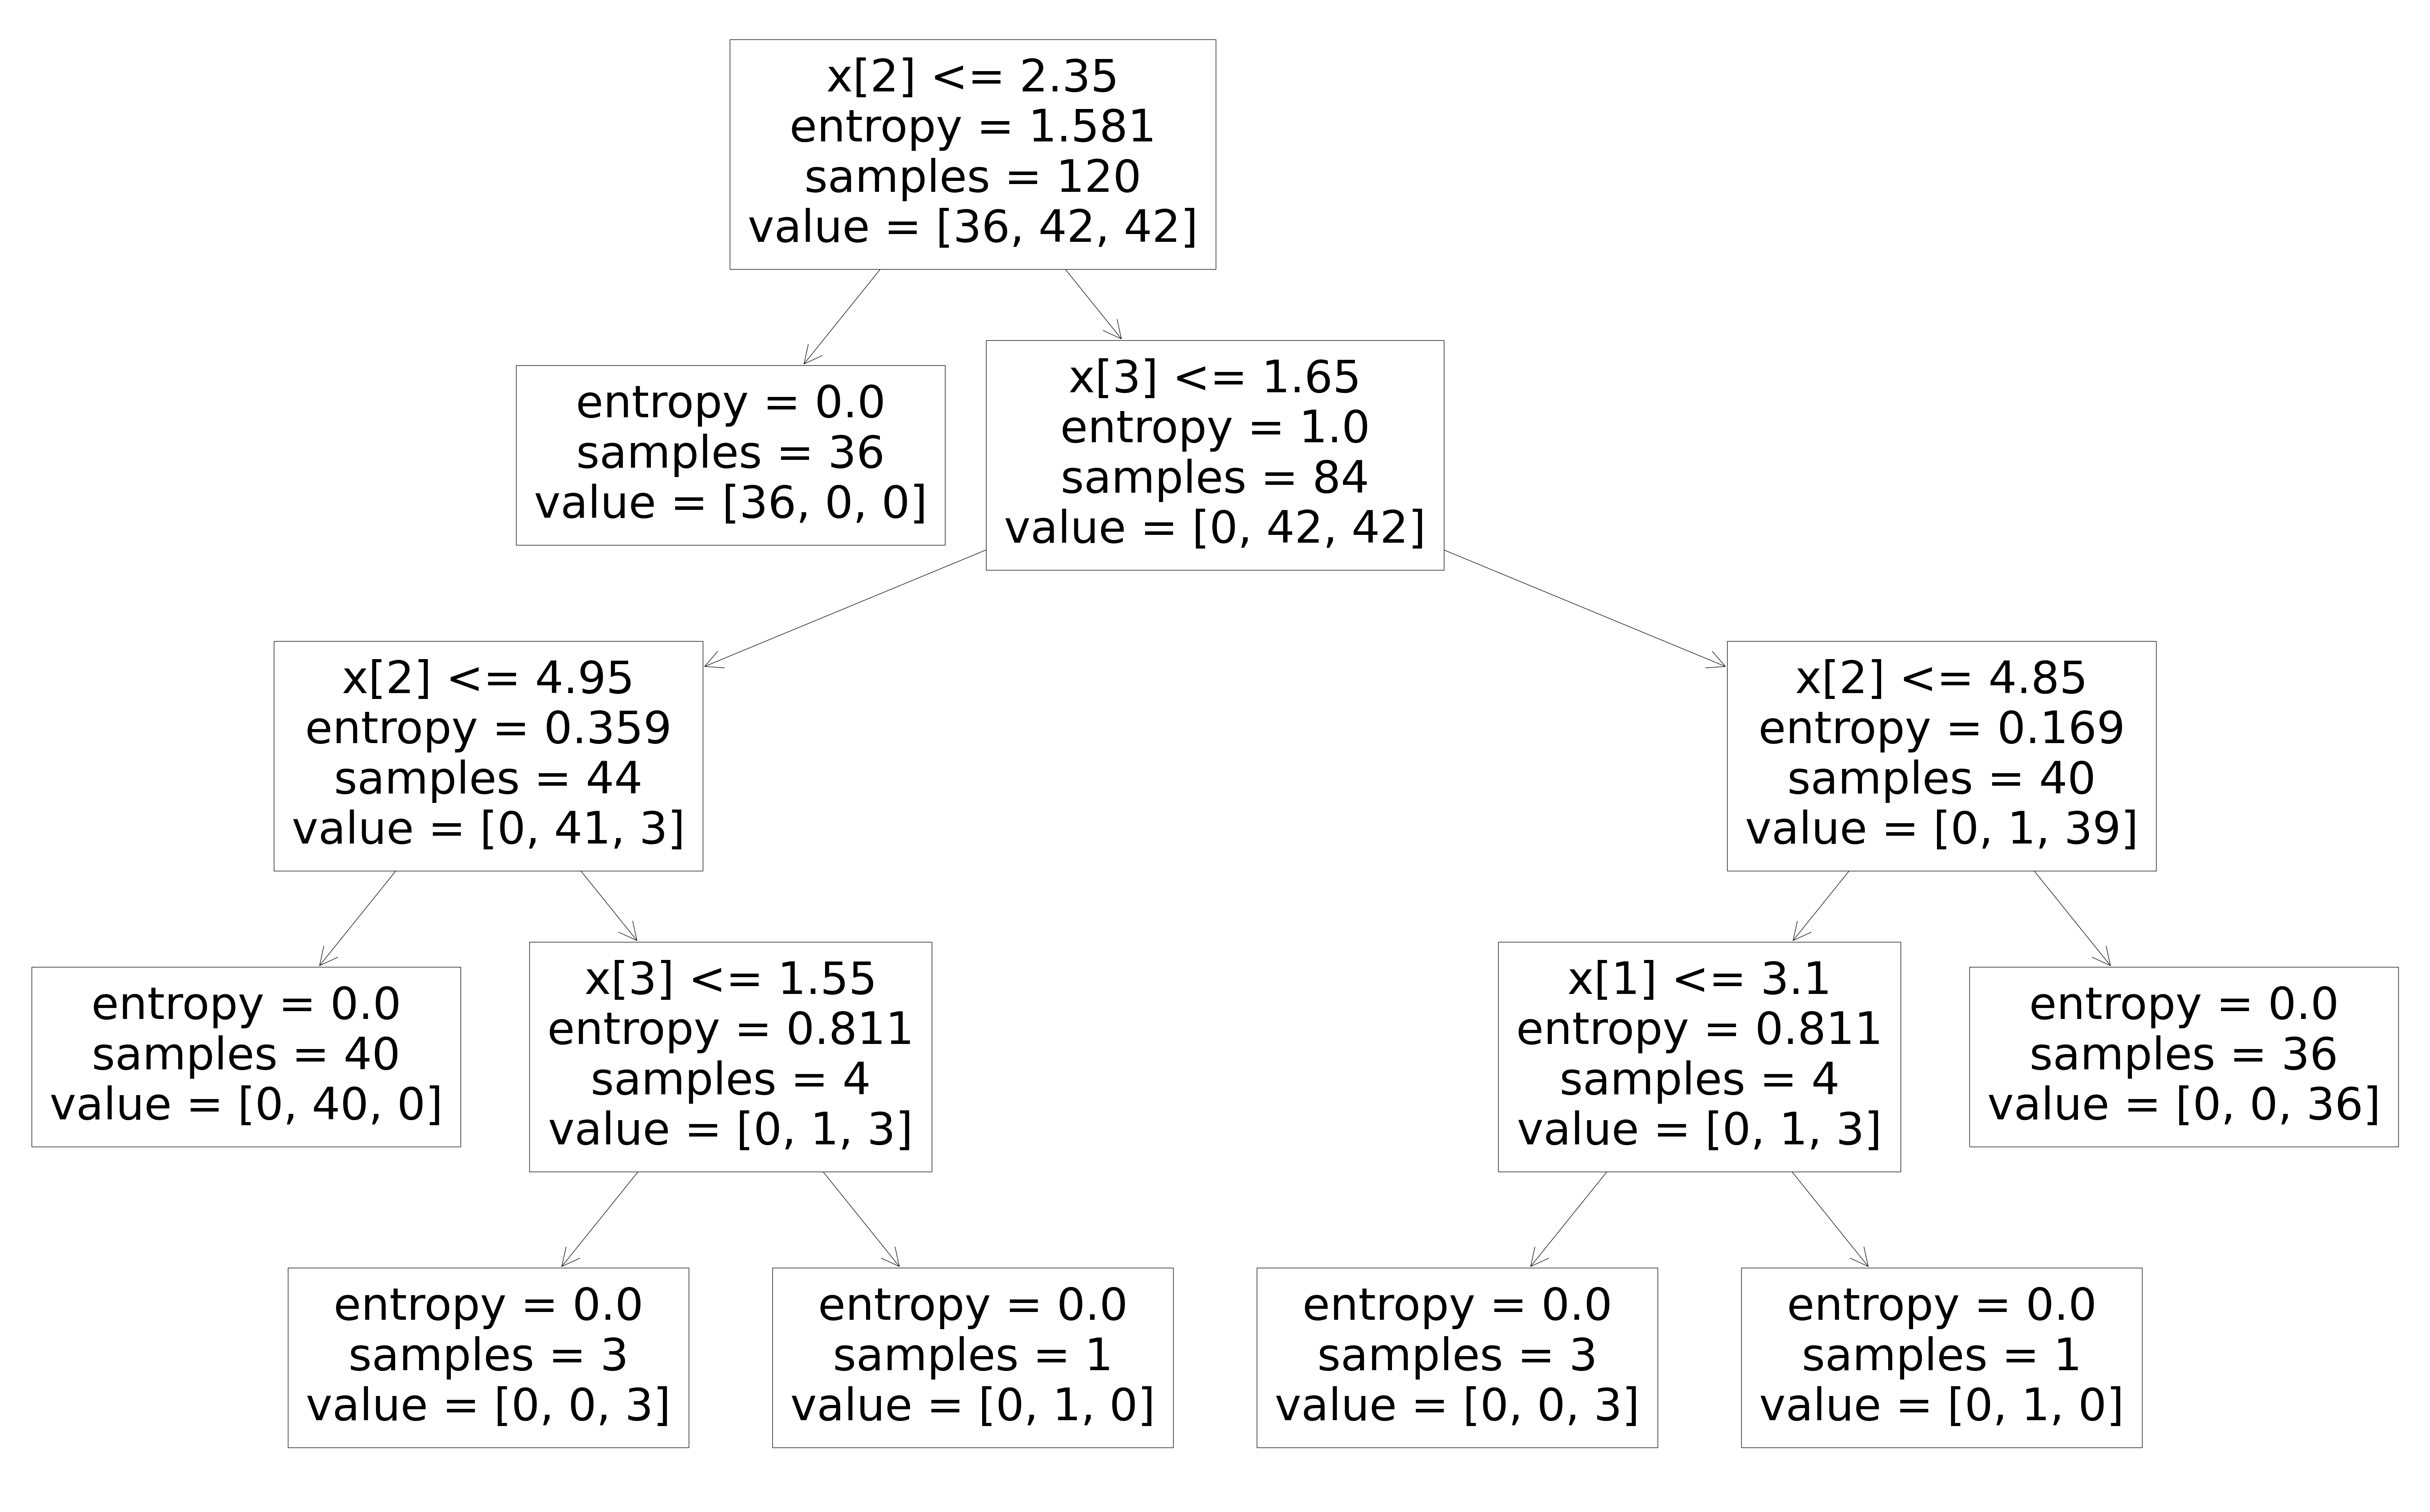

In [8]:
#plot the decision tree
rcParams['figure.figsize']=80,50
plot_tree(dt)
plt.show()

Hyper Parameter Tuning using gridsearchCV

In [9]:
df=pd.read_csv('Social_Network_Ads.csv')

In [10]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [11]:
df['Gender'].replace({"Male":1,"Female":0},inplace=True)

In [12]:
#extract values for input and output column
X1=df.iloc[:,1:4].values
y1=df.iloc[:,-1].values

In [13]:
#scale down the values
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X1=scaler.fit_transform(X1)

In [14]:
X_train1,x_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.2,random_state=2)

In [15]:
dt1=DecisionTreeClassifier()

In [16]:
dt1.fit(X_train1,y_train1)

DecisionTreeClassifier()

In [17]:
y_pred1=dt1.predict(x_test1)

In [18]:
print(f'The accuracy score is {accuracy_score(y_test1,y_pred1)*100}%')

The accuracy score is 83.75%


In [19]:
#using gridsearchcv
params={
    "criterion":['gini','entropy'],
    "max_depth":[1,2,3,4,5,6,7,None]
}

In [20]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(dt1,param_grid=params,cv=15,n_jobs=-1)

In [21]:
grid.fit(X_train1,y_train1)

GridSearchCV(cv=15, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]})

In [22]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=2)

In [23]:
#best parameter found by gridseachcv
grid.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [24]:
#highest accuracy score
print(f'The accuracy score is {str(grid.best_score_*100)[0:5]}%')

The accuracy score is 89.68%
